## Problem Statement
Analytics India Magazine is organizing this hackathon in association with Presidency University under its flagship program AIM Campus Program. The primary aim of this hackathon to make the students able to build powerful machine learning models in a competitive challenge and give recognition to the talented students.

This hackathon, named “Subscriber Prediction Talent Search Hackathon”, is being conducted by MachineHack - India’s leading machine learning competitive platform and a brand of Analytics India Magazine. This hackathon is specifically conducted for the participants from the Presidency University, Bangalore, where all the students having an interest in machine learning can take part in it.

This hackathon will try to address the challenges of banking telecallers when they call blindly to people in order to sell term deposit plans. The aim of this hackathon is to find the most accurate prediction of whether a person to be called will subscribe to the term deposit plan or not using any of the machine learning algorithms. The participants can use the historical data that consists of different features of customers and whether they subscribed to the plan or not. Using this data, the participants need to build a machine learning model in order to make predictions.

### Data Dictionary
- Age: Age of the customer
- Job: Type of job of customer
- Marital: Marital status of the customer
- Education: The education level of the customer
- Default: Has credit in default?
- Balance: Average yearly balance (in Euros)
- Housing: Has a housing loan?
- Loan: Has a personal loan?
- Contact: Contact communication type
- Day: Last contact day of the month
- Month: Last contact month of the year
- Duration: Last contact duration, in seconds
- Campaign: Number of contacts performed during this campaign and for this client
- Pdays: Number of days that passed by after the client was last contacted from a previous - - campaign (-1 means the client was not previously contacted)
- Previous: Number of contacts performed before this campaign and for this client
- Poutcome: Outcome of the previous marketing campaign
- y - Has the customer subscribed to a term deposit?

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import log_loss, make_scorer
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.model_selection import KFold, cross_val_score

from warnings import filterwarnings
filterwarnings('ignore')

In [114]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [115]:
train_data.shape, test_data.shape

((21000, 17), (9000, 16))

In [116]:
data = pd.concat([train_data, test_data], ignore_index = False)

In [117]:
data.shape

(30000, 17)

In [39]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        30000 non-null  int64  
 1   job        30000 non-null  object 
 2   marital    30000 non-null  object 
 3   education  30000 non-null  object 
 4   default    30000 non-null  object 
 5   balance    30000 non-null  int64  
 6   housing    30000 non-null  object 
 7   loan       30000 non-null  object 
 8   contact    30000 non-null  object 
 9   day        30000 non-null  int64  
 10  month      30000 non-null  object 
 11  duration   30000 non-null  int64  
 12  campaign   30000 non-null  int64  
 13  pdays      30000 non-null  int64  
 14  previous   30000 non-null  int64  
 15  poutcome   30000 non-null  object 
 16  y_bool     21000 non-null  float64
dtypes: float64(1), int64(7), object(9)
memory usage: 4.1+ MB


In [12]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'day']

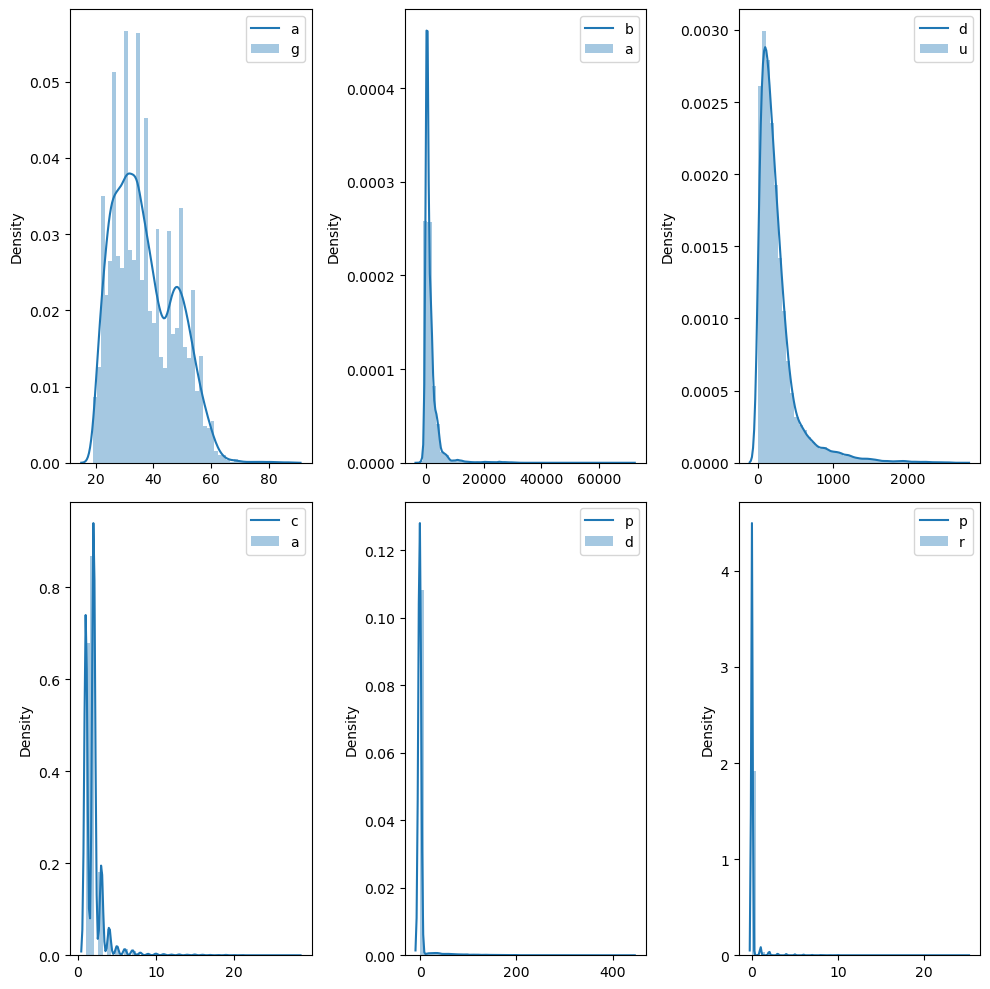

In [19]:
# Univariate Analysis
# -- Num_cols
plt.figure(figsize = (10,10))
j = 1
for i in num_cols:
    plt.subplot(2,3,j)
    sns.distplot(x = data[i]);
    plt.legend(i)
    j += 1
    
plt.tight_layout()
plt.show()

In [20]:
data.loc[:,num_cols].describe()

,age,balance,duration,campaign,pdays,previous
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,36.978767,1608.013900,262.788833,2.003433,3.125600,0.100633
std,10.487325,2989.866596,285.880993,1.545111,23.002464,0.669369
min,19.000000,-2477.000000,4.000000,1.000000,-1.000000,0.000000
25%,29.000000,303.000000,94.000000,1.000000,-1.000000,0.000000
50%,35.000000,634.000000,183.000000,2.000000,-1.000000,0.000000
75%,45.000000,1880.000000,318.000000,2.000000,-1.000000,0.000000
max,87.000000,71188.000000,2703.000000,28.000000,437.000000,25.000000


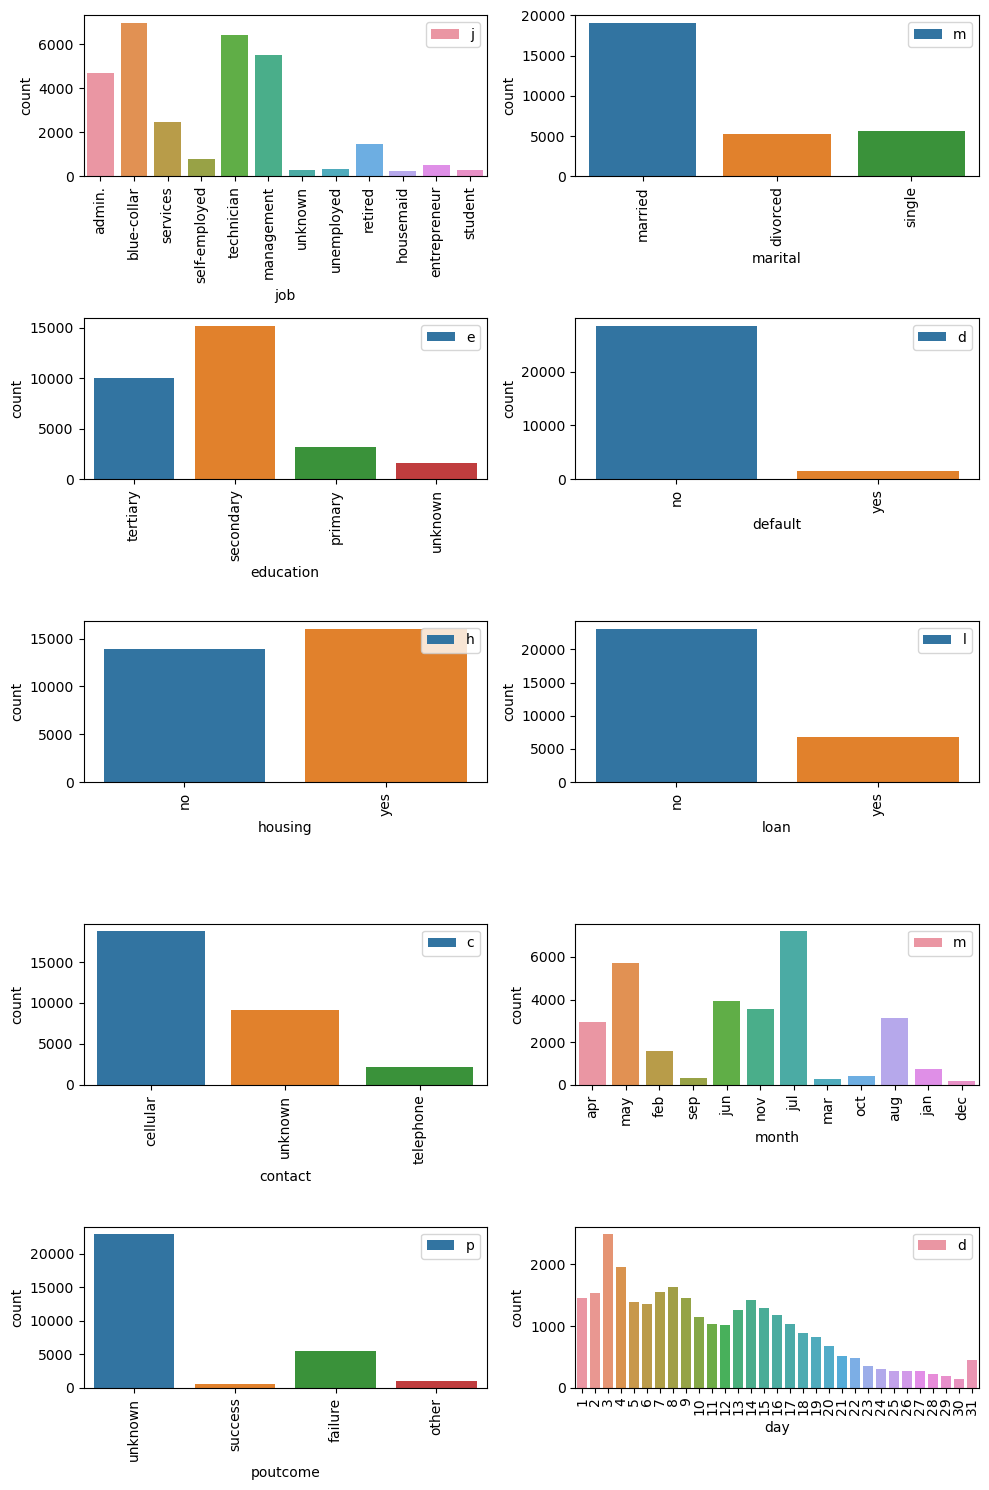

In [25]:
plt.figure(figsize = (10,15))
j = 1
for i in cat_cols:
    plt.subplot(5,2,j)
    sns.countplot(x = data[i]);
    plt.legend(i)
    plt.xticks(rotation = 90)
    j += 1
    
plt.tight_layout()
plt.show()

# job -- top 5 frequency - blue-collar, technician, management, admin, services


In [118]:
# Self employed, entrepreneur
# Housemaid, retires, Unknown, student, Unemployed

not_employed = ['housemaid', 'retired', 'unknown', 'student', 'unemployed']
self_employed = ['self-employed', 'entrepreneur']

data.job = pd.Series(['not_employed' if i in not_employed else i for i in data.job])
data.job = pd.Series(['self_employed' if i in self_employed else i for i in data.job])

<Axes: >

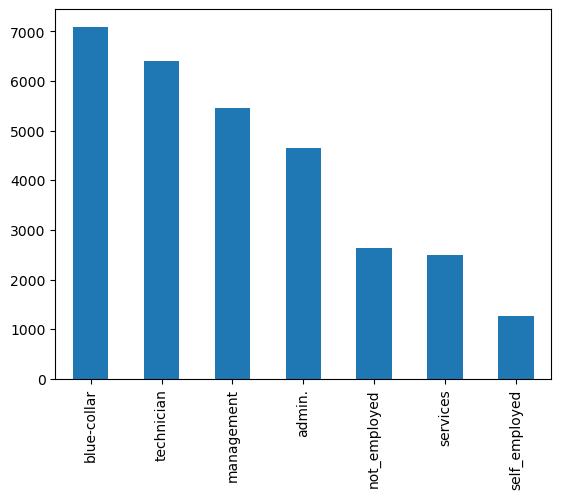

In [119]:
data.job.value_counts().plot(kind = 'bar')

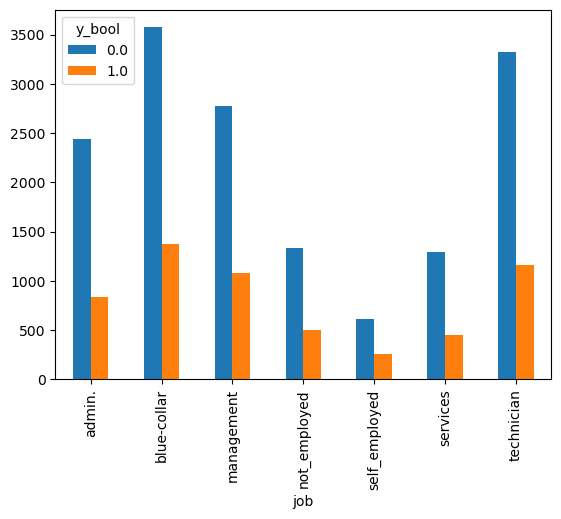

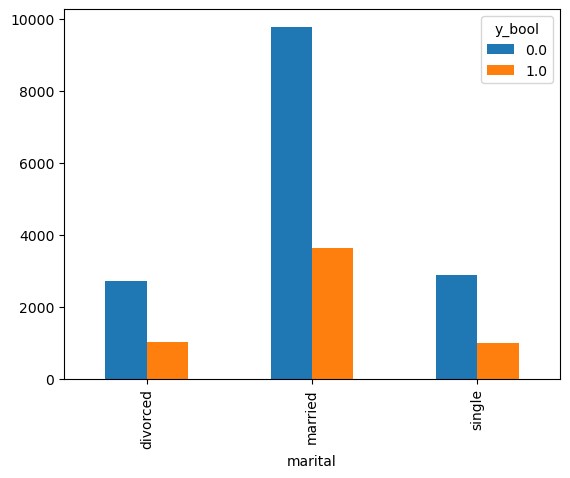

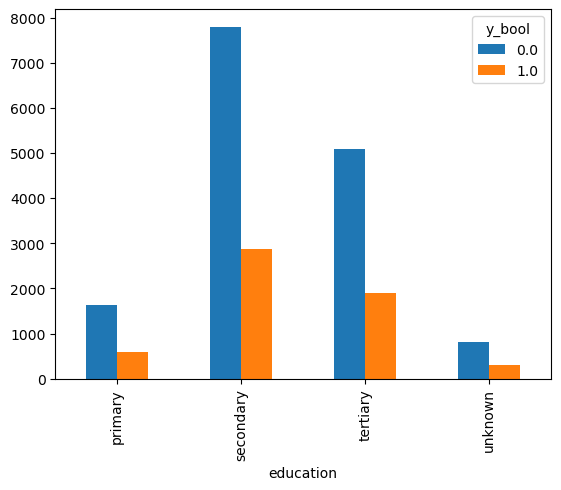

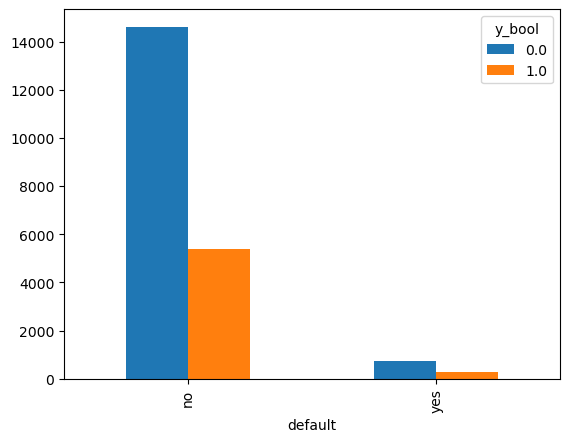

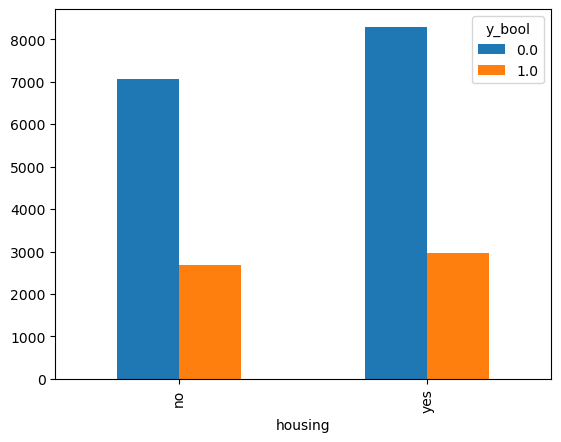

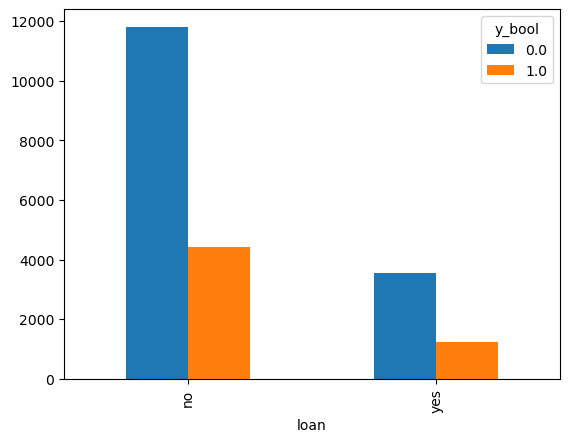

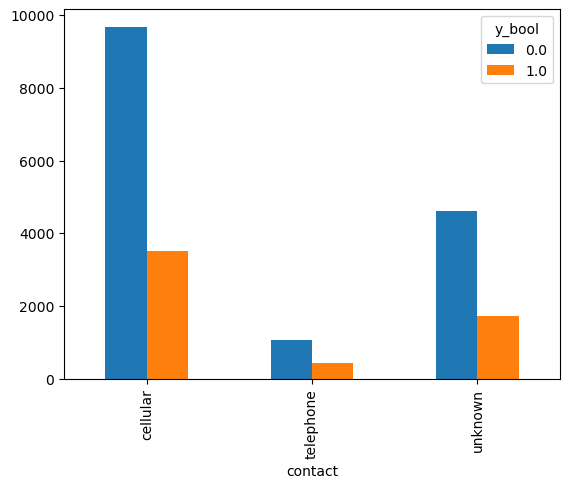

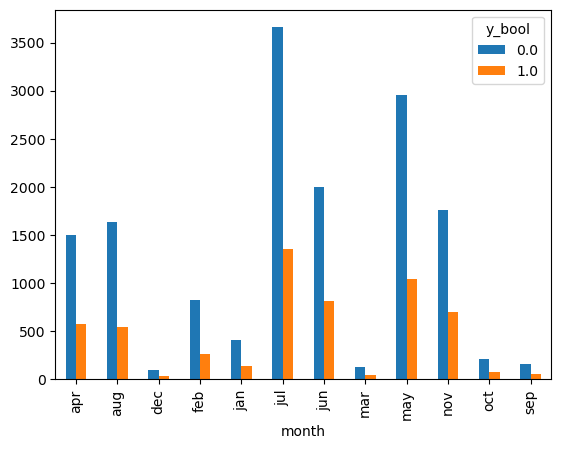

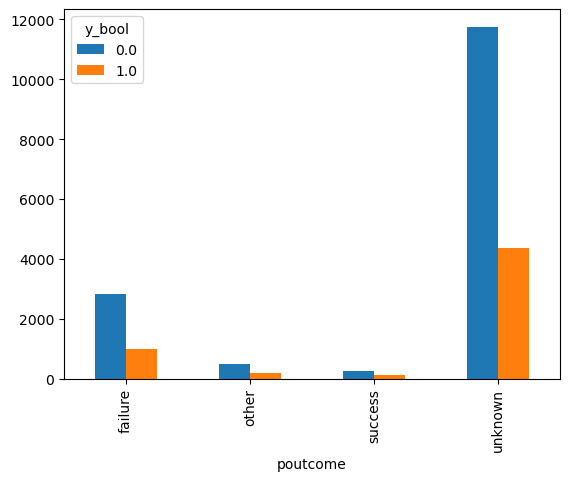

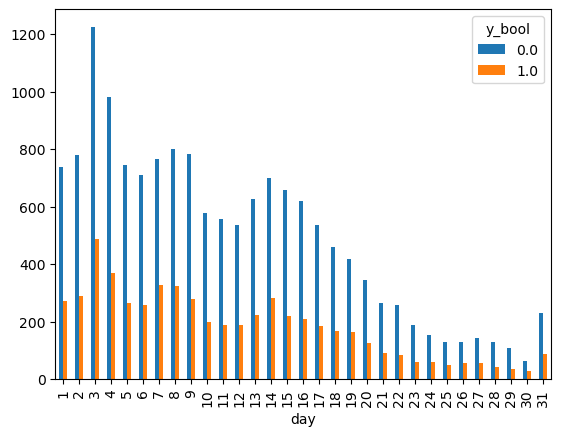

In [66]:
# Bivariate Analysis
# -- cat vs cat
for i in cat_cols:
    pd.crosstab(index = data[i], columns = data['y_bool'], values = data['y_bool']
           , aggfunc = 'count').plot(kind = 'bar');

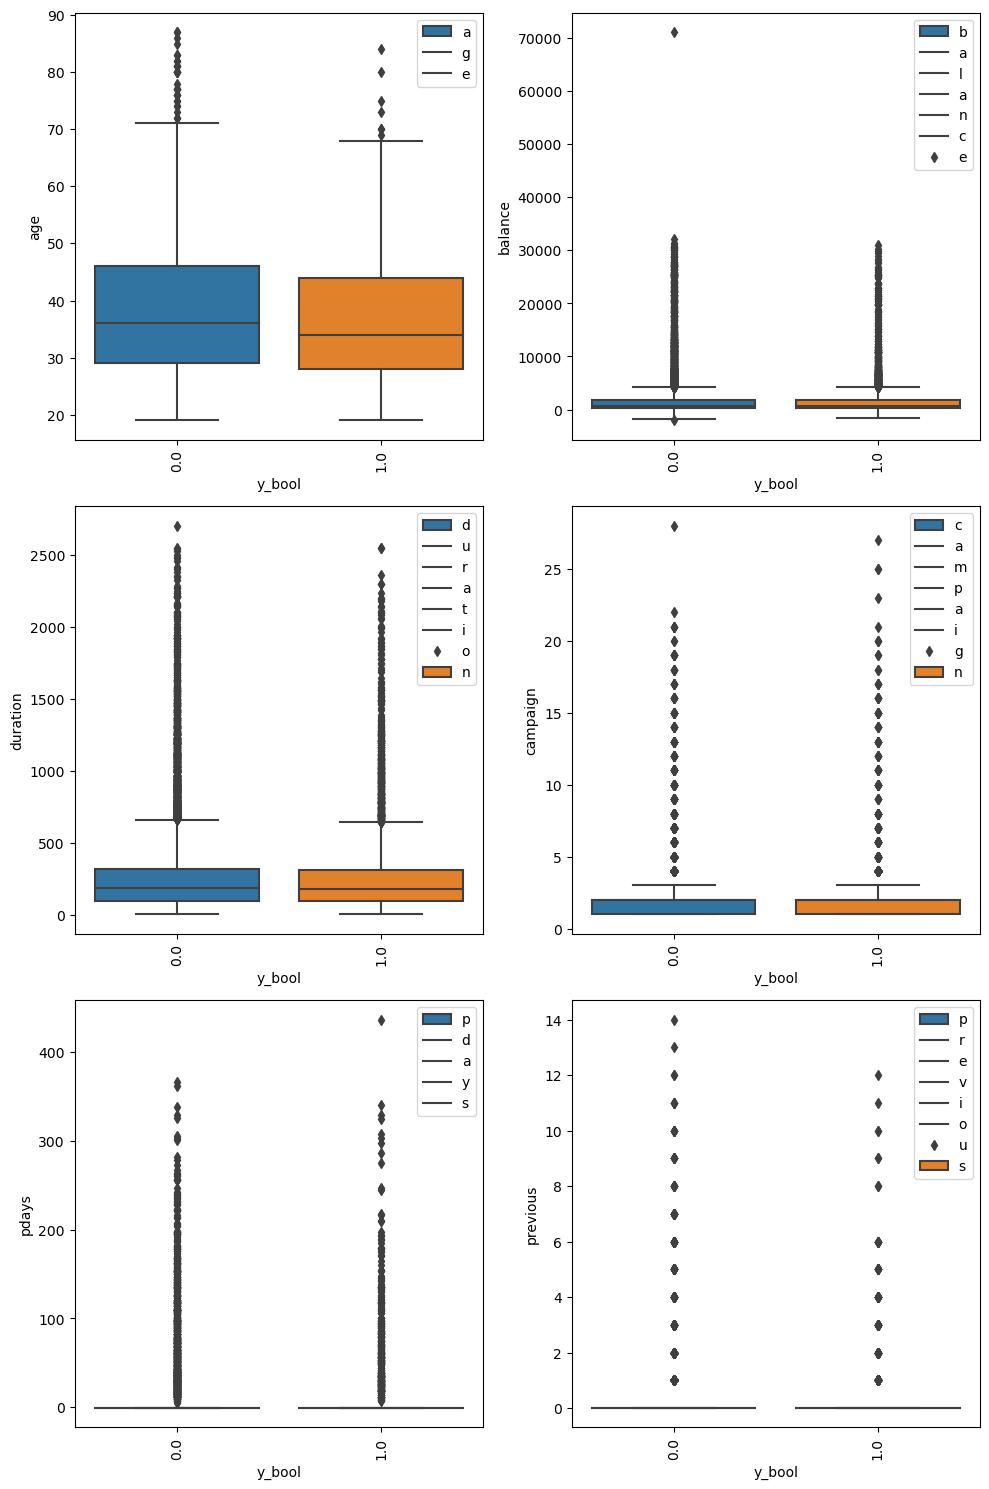

In [72]:
plt.figure(figsize = (10,15))
j = 1
for i in num_cols:
    plt.subplot(3,2,j)
    sns.boxplot(y = data[i], x = data['y_bool'].astype('object'));
    plt.legend(i)
    plt.xticks(rotation = 90)
    j += 1
    
plt.tight_layout()
plt.show()

In [120]:
data.day = data.day.apply(lambda x:'fortnight' if x in np.arange(1,16) else 'month-end')

In [121]:
# Missing Values
data.isnull().sum()
# No Missing Values

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y_bool       9000
dtype: int64

In [122]:
# month-wise duration
data['phone_calls'] = data.groupby(by = 'month')['duration'].transform('count')
data['min_duration'] = data.groupby(by = 'month')['duration'].transform('min')
data['max_duration'] = data.groupby(by = 'month')['duration'].transform('max')
data['median_duration'] = data.groupby(by = 'month')['duration'].transform('median')
data['mean_duration'] = data.groupby(by = 'month')['duration'].transform('mean')

In [88]:
data.groupby(by = 'month')['campaign'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
apr,2943.0,1.974856,1.468238,1.0,1.0,2.0,2.0,22.0
aug,3125.0,2.051520,1.607710,1.0,1.0,2.0,2.0,23.0
dec,189.0,1.957672,1.279256,1.0,1.0,2.0,2.0,11.0
feb,1590.0,1.956604,1.431465,1.0,1.0,2.0,2.0,22.0
jan,766.0,1.960836,1.652420,1.0,1.0,2.0,2.0,21.0
jul,7196.0,2.003752,1.625154,1.0,1.0,2.0,2.0,27.0
jun,3946.0,2.000760,1.492779,1.0,1.0,2.0,2.0,28.0
mar,251.0,1.992032,1.379832,1.0,1.0,2.0,2.0,12.0
may,5727.0,1.996857,1.498162,1.0,1.0,2.0,2.0,25.0


In [124]:
data.education.replace({'tertiary':3, 'secondary':2, 'primary':1, 'unknown':0}, inplace = True)

In [125]:
data['min_balance'] = data.groupby(by = 'month')['balance'].transform('min')
data['max_balance ']= data.groupby(by = 'month')['balance'].transform('max')
data['mean_balance'] = data.groupby(by = 'month')['balance'].transform('mean')
data['median_balance'] = data.groupby(by = 'month')['balance'].transform('median')
data['std_balance'] = data.groupby(by = 'month')['balance'].transform('std')

In [126]:
month_mapping = {
    'jan': 1, 'feb': 1, 'mar': 1,
    'apr': 2, 'may': 2, 'jun': 2,
    'jul': 3, 'aug': 3, 'sep': 3,
    'oct': 4, 'nov': 4, 'dec': 4
}

data['month'] = data['month'].str.lower().map(month_mapping)

In [156]:
stats_train = data.iloc[:train_data.shape[0],:]
stats_X = stats_train.drop(columns = 'y_bool', axis = 1)
stats_y  = stats_train['y_bool']

In [179]:
# Statistically testing the colummns
# -- cat vs cat columns
# H0: Each of the above columns is independent with target variable (y_bool)
# H1: Each of the above columns is dependent with target variable (y_bool)
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','day']
important_cat_columns = []
no = []
for i in cat_cols:
    test_stats, p_value, dof, exp_freq = stats.chi2_contingency(pd.crosstab(stats_X[i]
                                                                            ,stats_y))
    if(p_value < 0.05):
        important_cat_columns.append({i:p_value})
    else:
        no.append(i)
        pass

important_cat_columns

# from the above columns only cat_cols is proven to be significant -- job, month
# possibility of one more columns is there --  housing (Type - 2 error)
# One model would be build with housing and one would be wothout housing

[{'job': 0.039415810763435644}, {'month': 0.04597093223395938}]

In [180]:
# -- cat vs num_cols -- would be two numerical variable -- ttest for indepdence
# H0: Two samples are indepndent
# H1: Two samples are dependent

num_cols = ['age','balance','duration','campaign','pdays','previous','phone_calls','min_duration', 'max_duration',
       'median_duration', 'mean_duration', 'min_balance', 'max_balance ',
       'mean_balance', 'median_balance', 'std_balance']
important_num_columns = []
no_num = []
for i in num_cols:
    sample1 = stats_train.loc[stats_train['y_bool'] == 0, i]
    sample2 = stats_train.loc[stats_train['y_bool']== 1, i]

    test_stats, p_value = stats.ttest_ind(sample1, sample2)
    if(p_value < 0.05):
        important_num_columns.append({i:p_value})
    else:
        no_num.append(i)
        pass
    
important_num_columns
# Of 16 columns only 6 has significant relation with target.

[{'age': 5.417838494316038e-13},
 {'campaign': 0.01168047299635314},
 {'max_duration': 0.012941912964638381},
 {'max_balance ': 0.04634958713929319},
 {'mean_balance': 0.007376029909209648},
 {'median_balance': 0.049260296515570026}]

In [185]:
data.drop(columns = ['marital','education','default','housing','loan','contact',
                          'poutcome','day','balance','duration','pdays','previous',
                          'phone_calls','min_duration','median_duration','mean_duration',
                          'min_balance','std_balance'], axis = 1, inplace = True)

In [186]:
dummy_data = pd.get_dummies(data, drop_first = True)
dummy_data.shape

(30000, 14)

In [187]:
newtrain = dummy_data.iloc[:train_data.shape[0],:]
newtest = dummy_data.iloc[train_data.shape[0]:,:]

In [188]:
newtrain.shape, train_data.shape, newtest.shape, test_data.shape

((21000, 14), (21000, 17), (9000, 14), (9000, 16))

In [189]:
X = newtrain.drop(columns = 'y_bool', axis = 1)
y = newtrain['y_bool']

In [190]:
finaltest = newtest.drop(columns = 'y_bool', axis = 1)

In [221]:
# Modelling
def base_model():
    models = dict()
    models['lr'] = LogisticRegression()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['adb'] = AdaBoostClassifier()
    models['xgb'] = XGBClassifier()
    models['svm'] = SVC()
    return models

In [222]:
# model evaluation
def model_eval(models):
    func = make_scorer(log_loss)
    cv = KFold(n_splits = 5, shuffle = True, random_state = 1001)
    scores = abs(cross_val_score(estimator = models, X = X, y = y , scoring = func
                             , cv = cv, n_jobs = -1))
    return scores

In [223]:
# Let's build a function to calculate the scores
models = base_model()
result, name = list(), list()
for names, models in models.items():
    final_score = model_eval(models)
    result.append(final_score)
    name.append(names)
    print(names, np.mean(final_score))

lr 9.699175490566716
dtree 11.928732907350675
rf 12.258274881194033
gbm 9.733502779508733
adb 9.702608219460917
xgb 10.035582922198476
svm 9.699175490566716


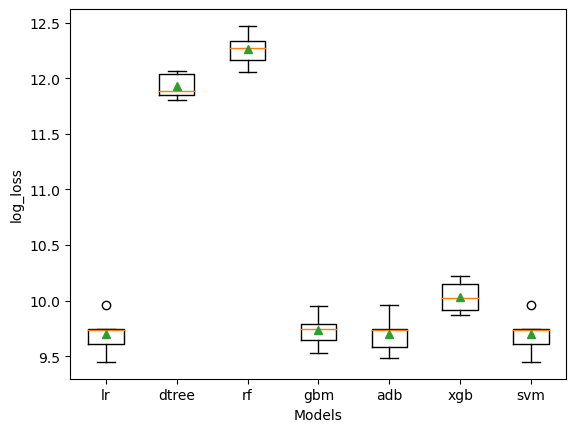

In [224]:
# Plot the results...

plt.boxplot(result, labels = name, showmeans = True)
plt.xlabel("Models")
plt.ylabel("log_loss")
plt.show()

In [225]:
# Let's Bulid One more model Using SMOTE
smote = SMOTE(sampling_strategy = 'minority')
smote_x, smote_y = smote.fit_resample(X,y)

In [226]:
def model_eval_smote(models):
    func = make_scorer(log_loss)
    cv = KFold(n_splits = 5, shuffle = True, random_state = 1001)
    scores = abs(cross_val_score(estimator = models, X = smote_x, y = smote_y , scoring = func
                             , cv = cv, n_jobs = -1))
    return scores

In [227]:
models = base_model()
result, name = list(), list()
for names, models in models.items():
    final_score = model_eval_smote(models)
    result.append(final_score)
    name.append(names)
    print(names, np.mean(final_score))

lr 17.445341824079616
dtree 13.044663488367963
rf 12.82979992193789
gbm 14.83403744413324
adb 15.115834882711692
xgb 13.755019163082745
svm 17.789356621226197


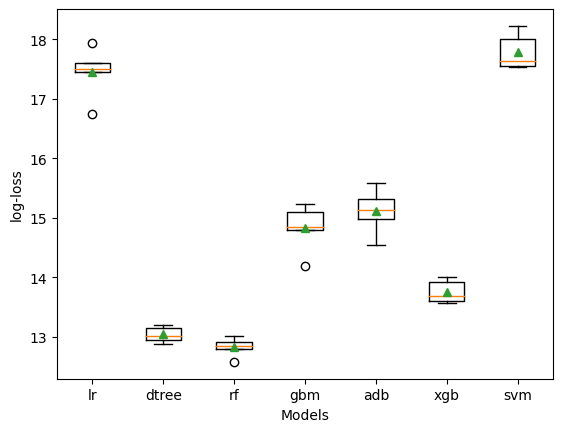

In [230]:
# let's plot the results...

plt.boxplot(result, labels = name, showmeans = True)
plt.xlabel('Models')
plt.ylabel('log-loss')
plt.show()

Results are more congurent with original data, thereby we are going with orginial data and applying the stacking model using -- gbm, adm, svm using lr as final estimator.

In [234]:
gdm = GradientBoostingClassifier()
adm = AdaBoostClassifier()
svm = SVC()
stack = StackingClassifier(estimators = [('gdm',gdm),('adm',adm),('svm',svm)],
                          final_estimator = LogisticRegression(), cv = 5)
predictions = stack.fit(X,y).predict(finaltest)

In [240]:
submission = pd.DataFrame(predictions.astype(int), columns = ['y_bool'])

In [242]:
submission.to_csv('Term_Deposit.csv' ,index = False)